In this lab we discuss normal data and calculation of normal proportions.

# Standard Normal Distribution (mean of zero and variance of one)

**numpy.random.randn:** https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import randn

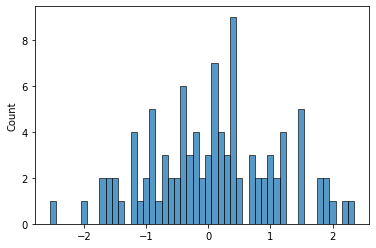

In [2]:
# Setting the seed for the random generation
# We need to set a seed in order to be able to reproduce the results.
np.random.seed(0)

# Standard normal distribution with 100 points
# randn() returns a sample from the “standard normal” distribution.
data_100 = randn(100)
sns.histplot(data_100, binwidth = 0.1)
plt.show()

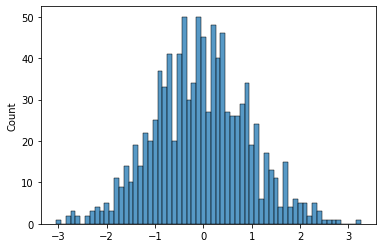

In [3]:
# Standard normal distribution with 1000 points
data_1000 = randn(1000)
sns.histplot(data_1000, binwidth = 0.1)
plt.show()

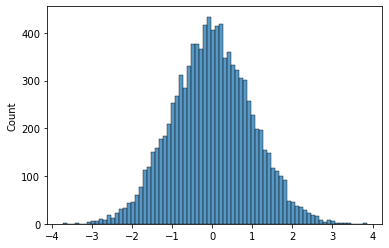

In [4]:
# Standard normal distribution with 10000 points
data_10000 = randn(10000)
sns.histplot(data_10000, binwidth = 0.1)
plt.show()

# Normal Distribution

**scipy.stats.norm:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

## Generating 1000 data points from a normal distribution with mean of 10 and standard deviation of 2.

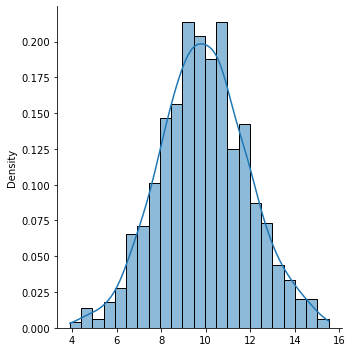

In [5]:
# loc and scale denote mean and standard deviation, respectively.
normal = norm.rvs(loc = 10, scale = 2, size = 1000, random_state = 0)
sns.displot(normal, stat = 'density', kde = True)
plt.show()

## Finding the probability that the variable has a value less than or equal to 12. 

In [6]:
norm.cdf(12, loc = 10, scale = 2)

0.8413447460685429

This probability corresponds to the following area under the density curve:

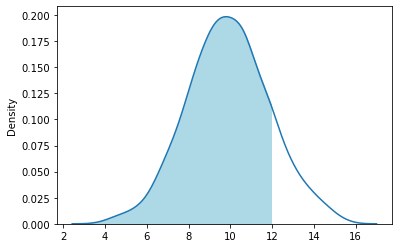

In [7]:
points = sns.kdeplot(normal).get_lines()[0].get_data()
x = points[0]
y = points[1]
plt.fill_between(x,y, where = x <=12, color='lightblue')


## We can also calculate the probability above using the **z-score** and the standard normal distribution.

In [8]:
z = (12 - 10)/2
print(z)

1.0


In [9]:
norm.cdf(1) ## in this case the default for loc and scale is 0 and 1, a standard normal distribution

0.8413447460685429

## Finding the probability that the variable has a value greater than or equal to 12. This probability is equal to 1 - norm.cdf(12, loc = 10, scale = 2).

In [10]:
1 - norm.cdf(12, loc = 10, scale = 2)

0.15865525393145707

This probability corresponds to the following area under the density curve:

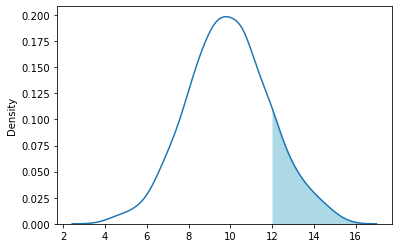

In [11]:
points = sns.kdeplot(normal).get_lines()[0].get_data()
x = points[0]
y = points[1]
plt.fill_between(x,y, where = x >=12, color='lightblue')

## Finding the variable value that gives you a certain probability.

Example 1: which variable value x gives you a probability of 0.84 for that variable to be less than or equal to x? The output is very close to 12.

In [12]:
norm.ppf(0.84, loc = 10, scale = 2)

11.988915766419506

Example 2: which variable value x gives you a probability of 0.025 for the variable to be less than or equal to x? The output is close to 6.  

In [13]:
norm.ppf(0.025, loc = 10, scale = 2)

6.080072030919891

Example 3: which variable value x gives you a probability of 0.16 for the variable to be greater than or equal to x? The output is close to 12.

In [14]:
norm.ppf(1-0.16, loc = 10, scale = 2) ## this value is the same as the one in Example 1 

11.988915766419506

# The 68–95–99.7 Rule

## Plotting the probability density function (pdf) corresponding to a normal distribution with a mean (mu) of 10 and a standard deviation (sigma) of 2.

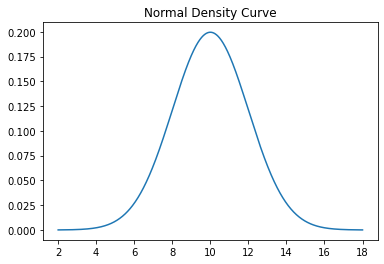

In [15]:
mu = 10
sigma = 2
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000) # creating a range of x values
pdf = norm.pdf(x, loc = mu, scale = sigma) # calculating the density values corresponding to each x
plt.plot(x, pdf) # ploting density versus x
plt.title('Normal Density Curve')
plt.show()

## Percentage of observations between (mu - sigma) and (mu + sigma):

In [16]:
cdf_upper_limit = norm.cdf(mu + sigma, loc = mu, scale = sigma)
cdf_lower_limit = norm.cdf(mu - sigma, loc = mu, scale = sigma)
percent = cdf_upper_limit - cdf_lower_limit
print(np.round(percent * 100, 2), '% of observations fall between (mu - sigma) and (mu + sigma).')

68.27 % of observations fall between (mu - sigma) and (mu + sigma).


This percentage corresponds to the following area under the curve:

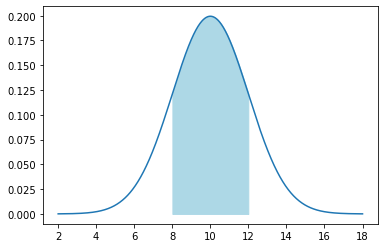

In [17]:
plt.plot(x, pdf)
plt.fill_between(x,pdf, where = (x<=12) & (x>=8), color='lightblue')

## Percentage of observations between (mu - 2 * sigma) and (mu + 2 * sigma):

In [18]:
cdf_upper_limit = norm.cdf(mu + 2 * sigma, loc = mu, scale = sigma)
cdf_lower_limit = norm.cdf(mu - 2 * sigma, loc = mu, scale = sigma)
percent = cdf_upper_limit - cdf_lower_limit
print(np.round(percent * 100, 2), '% of observations fall between (mu - 2 * sigma) and (mu + 2 * sigma).')

95.45 % of observations fall between (mu - 2 * sigma) and (mu + 2 * sigma).


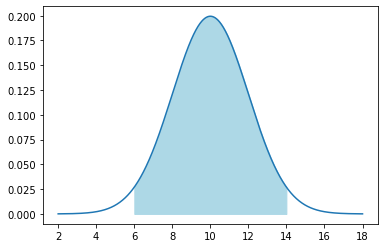

In [19]:
plt.plot(x, pdf)
plt.fill_between(x,pdf, where = (x<=14) & (x>=6), color='lightblue')

## Percentage of observations between (mu - 3 * sigma) and (mu + 3 * sigma):

In [20]:
# Percentage of observations between (mu - 3 * sigma) and (mu + 3 * sigma)
cdf_upper_limit = norm.cdf(mu + 3 * sigma, loc = mu, scale = sigma)
cdf_lower_limit = norm.cdf(mu - 3 * sigma, loc = mu, scale = sigma)
percent = cdf_upper_limit - cdf_lower_limit
print(np.round(percent * 100, 2), '% of observations fall between (mu - 3 * sigma) and (mu + 3 * sigma).')

99.73 % of observations fall between (mu - 3 * sigma) and (mu + 3 * sigma).


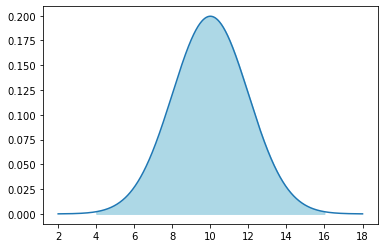

In [21]:
plt.plot(x, pdf)
plt.fill_between(x,pdf, where = (x<=16) & (x>=4), color='lightblue')